In [6]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


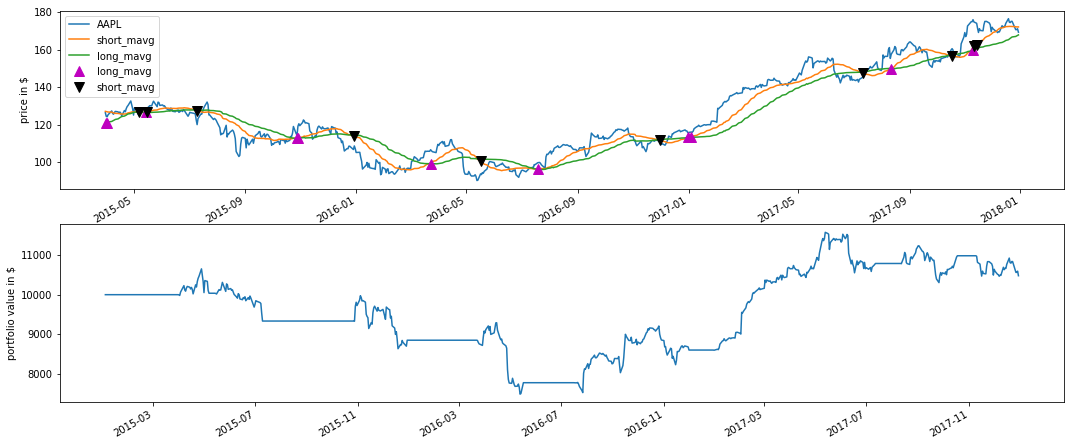

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.000535,NaN,NaN,0.0,10000.000000,0.000,...,NaN,0.0,0,NaN,10000.000000,0.000,0.000,1,[],0.0
2015-01-05 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.018585,0.196720,0.000000,0.0,10000.000000,0.000,...,NaN,0.0,0,NaN,10000.000000,0.000,0.000,2,[],0.0
2015-01-06 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.027829,0.139106,0.000000,0.0,10000.000000,0.000,...,NaN,0.0,0,NaN,10000.000000,0.000,0.000,3,[],0.0
2015-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.015715,0.206973,0.000000,0.0,10000.000000,0.000,...,NaN,0.0,0,NaN,10000.000000,0.000,0.000,4,[],0.0
2015-01-08 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.001752,0.236042,0.000000,0.0,10000.000000,0.000,...,NaN,0.0,0,NaN,10000.000000,0.000,0.000,5,[],0.0
2015-01-09 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.006276,0.218112,0.000000,0.0,10000.000000,0.000,...,NaN,0.0,0,NaN,10000.000000,0.000,0.000,6,[],0.0
2015-01-12 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.014060,0.203322,0.000000,0.0,10000.000000,0.000,...,NaN,0.0,0,NaN,10000.000000,0.000,0.000,7,[],0.0
2015-01-13 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.016834,0.188302,0.000000,0.0,10000.000000,0.000,...,NaN,0.0,0,NaN,10000.000000,0.000,0.000,8,[],0.0
2015-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.022769,0.177394,0.000000,0.0,10000.000000,0.000,...,NaN,0.0,0,NaN,10000.000000,0.000,0.000,9,[],0.0
2015-01-15 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.031722,0.170558,0.000000,0.0,10000.000000,0.000,...,NaN,0.0,0,NaN,10000.000000,0.000,0.000,10,[],0.0


In [23]:
%%zipline --start 2015-1-1 --end 2018-1-1 --capital-base 10000 -o ../data/strategy2.pickle
from zipline.api import (
    order_target, 
    record, 
    order_target_percent, 
    symbol,
    schedule_function,
    date_rules)

import matplotlib.pyplot as plt


def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')
    schedule_function(rebalance, date_rule=date_rules.every_day())
    
    
def rebalance(context, data):
        
    # Skip first 300 days to get full windows
    long_win, short_win = 60, 30
    context.i += 1
    if context.i < long_win:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=short_win, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=long_win, frequency="1d").mean()

    # Trading logic
    if data.can_trade(context.asset):
        if short_mavg > long_mavg:
            # order_target orders as many shares as needed to
            # achieve the desired number of shares.
            order_target_percent(context.asset, 1)
            #order_target(context.asset, 100)
        elif short_mavg < long_mavg:
            #order_target(context.asset, 0)
            order_target_percent(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(212)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(211)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.long_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.gcf().set_size_inches(18, 8)
    plt.show()

In [18]:
import pandas as pd

In [27]:
perf = pd.read_pickle('../data/strategy2.pickle')
print("Benchmark:{}, Our strategy: {}".format(perf['benchmark_period_return'][-1], perf['algorithm_period_return'][-1]))
perf[['benchmark_period_return','algorithm_period_return']]


Benchmark:0.379827139153, Our strategy: 0.04794843645


,benchmark_period_return,algorithm_period_return
2015-01-02 21:00:00+00:00,-0.000535,0.000000
2015-01-05 21:00:00+00:00,-0.018585,0.000000
2015-01-06 21:00:00+00:00,-0.027829,0.000000
2015-01-07 21:00:00+00:00,-0.015715,0.000000
2015-01-08 21:00:00+00:00,0.001752,0.000000
2015-01-09 21:00:00+00:00,-0.006276,0.000000
2015-01-12 21:00:00+00:00,-0.014060,0.000000
2015-01-13 21:00:00+00:00,-0.016834,0.000000
2015-01-14 21:00:00+00:00,-0.022769,0.000000
2015-01-15 21:00:00+00:00,-0.031722,0.000000
